# Week 5 - Crafting the public interface. 

## Learning Objectives

* Explain what a public interface is
* Discuss the advantages of defining a public interface
* Compare different public interfaces
* Design a simple public interface

##Inheritance

Last week we looked at inheritance, building a general class that we could then extend with additional functionality for special situations. 

Each of the classes we create inheriting from our general class can be thought of as having a 'is-a' relationship with the general class. For example, looking at our Item example from last week Equipment __is a__ Item, Consumable __is a__ Item.

In [ ]:
class Item(object):
    
    
    def __init__(self, name, description, location):
        self.name = name
        self.description = description
        self.location = location
        
        
    def update_location(self, new_location):
        pass

class Equipment(Item):
    pass

class Consumable(Item):
    
    
    def __init__(self, name, description, location, initial_quantity, current_quantity, storage_temp, flammability):
        self.name = name
        self.description = description
        self.location = location
        self.initial_quantity = initial_quantity
        self.current_quantity = current_quantity
        self.flammability = flammability
        
        
    def update_quantity_remaining(self, amount):
        pass

##Composition

In week 3 we took example projects and broke them down into a collection of different classes. Many of you chose the cookbook example for the assignment and questioned whether things like ingredients should be attributes on the recipe class or classes in their own right. Often the answer is both. These are the interactions that change a collection of different classes into a functioning program. This is called composition. The Recipe object is a composite object, it __has__ ingredients, it __has__ instructions, etc.

This week we will look at how we can design our classes to be easy to use, for both programmer-class and class-class interactions.

In [11]:
class Ingredient(object):
    """The ingredient object that contains nutritional information"""
    
    def __init__(self, name, carbs, protein, fat):
        self.name = name
        self.carbs = carbs
        self.protein = protein
        self.fat = fat
        
    
    def get_nutrition(self):
        """Returns the nutritional information for the ingredient"""
        return (self.carbs, self.protein, self.fat)
    

class Recipe(object):
    """The Recipe object containing the ingredients"""
    
    def __init__(self, name, ingredients):
        self.name = name
        self.ingredients = ingredients
        
        
    def get_nutrition(self):
        """Returns the nutritional information for the recipe"""
        nutrition = [0, 0, 0]
        for amount, ingredient in self.ingredients:
            nutrition[0] += amount * ingredient.carbs
            nutrition[1] += amount * ingredient.protein
            nutrition[2] += amount * ingredient.fat
        return nutrition
    

bread = Recipe('Bread', [(820, Ingredient('Flour', 0.77, 0.10, 0.01)), 
                         (30, Ingredient('Oil', 0, 0, 1)), 
                         (36, Ingredient('Sugar', 1, 0, 0)), 
                         (7, Ingredient('Yeast', 0.3125, 0.5, 0.0625)),
                         (560, Ingredient('Water', 0, 0, 0))])
print(bread.ingredients)
print(bread.get_nutrition())

[(820, <__main__.Ingredient object at 0x7f5490ed5860>), (30, <__main__.Ingredient object at 0x7f5490ed50f0>), (36, <__main__.Ingredient object at 0x7f5490ec5c50>), (7, <__main__.Ingredient object at 0x7f5490ec5780>), (560, <__main__.Ingredient object at 0x7f5490ec5908>)]
[669.5875, 85.5, 38.6375]


This has the basic functionality implemented but there are some improvements we can make. 

Before we look at making changes we can seek inspiration. [Requests](http://docs.python-requests.org/en/master/#) and [Pandas](http://pandas.pydata.org/) are two packages well regarded for having well implemented interfaces.

##Requests: HTTP for Humans

Requests is a package used for making HTTP requests. There are options in the python standard library for making http requests but they can seem difficult to use. 

In [27]:
import requests

In [29]:
r = requests.get('https://api.github.com/repos/streety/biof509/events')
print(r.status_code)
print(r.headers['content-type'])

200
application/json; charset=utf-8


In [42]:
print(r.text[:1000])

[{"id":"3689166649","type":"PushEvent","actor":{"id":736229,"login":"streety","gravatar_id":"","url":"https://api.github.com/users/streety","avatar_url":"https://avatars.githubusercontent.com/u/736229?"},"repo":{"id":50923925,"name":"streety/biof509","url":"https://api.github.com/repos/streety/biof509"},"payload":{"push_id":993700103,"size":1,"distinct_size":1,"ref":"refs/heads/gh-pages","head":"0f92b281b89cf4249b2bfbe07d349cef4d8e454a","before":"37b6165404f66d34805b27b1f65bb071bfa79d57","commits":[{"sha":"0f92b281b89cf4249b2bfbe07d349cef4d8e454a","author":{"email":"jonathan@jonathanstreet.com","name":"Jonathan Street"},"message":"Added week 4 material","distinct":true,"url":"https://api.github.com/repos/streety/biof509/commits/0f92b281b89cf4249b2bfbe07d349cef4d8e454a"}]},"public":true,"created_at":"2016-02-25T15:36:20Z"},{"id":"3689166625","type":"PushEvent","actor":{"id":736229,"login":"streety","gravatar_id":"","url":"https://api.github.com/users/streety","avatar_url":"https://avata

In [41]:
print(r.json()[0]['payload']['commits'][0]['message'])

Added week 4 material


In [43]:
type(r)

requests.models.Response

[The API documentation for requests](http://docs.python-requests.org/en/master/api/)

[The Response class](https://github.com/kennethreitz/requests/blob/master/requests/models.py#L528)

Some useful features:

* [property](https://github.com/kennethreitz/requests/blob/master/requests/models.py#L620)


##Pandas

    pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and 
    data analysis tools for the Python programming language.

In [15]:
import pandas as pd

In [18]:
data = pd.DataFrame([[0,1,2,3], [4,5,6,7], [8,9,10,11]], index=['a', 'b', 'c'], columns=['col1', 'col2', 'col3', 'col4'])
data

,col1,col2,col3,col4
a,0,1,2,3
b,4,5,6,7
c,8,9,10,11


In [26]:
print(data.shape)

(3, 4)


In [22]:
print(data['col1'])
print(data.col1)

a    0
b    4
c    8
Name: col1, dtype: int64
a    0
b    4
c    8
Name: col1, dtype: int64


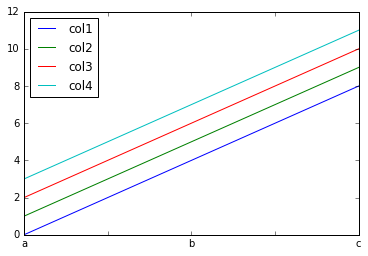

In [21]:
import matplotlib.pyplot as plt

%matplotlib inline

data.plot()

In [25]:
data.to_csv('Wk05-temp.csv')

data2 = pd.read_csv('Wk05-temp.csv', index_col=0)
print(data2)

   col1  col2  col3  col4
a     0     1     2     3
b     4     5     6     7
c     8     9    10    11


[The API documentation for the DataFrame object](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html#pandas.DataFrame).

[The actual code](https://github.com/pydata/pandas/blob/master/pandas/core/frame.py).

Some useful features:
* [classmethod](https://github.com/pydata/pandas/blob/master/pandas/core/frame.py#L1131)
* [property](https://github.com/pydata/pandas/blob/master/pandas/core/frame.py#L441)
* [`__getitem__`](https://github.com/pydata/pandas/blob/master/pandas/core/frame.py#L1968)
* [Public and private attributes/methods](https://github.com/pydata/pandas/blob/master/pandas/core/frame.py#L1993)
* [`__getattr__`](https://github.com/pydata/pandas/blob/master/pandas/core/generic.py#L2651)

##Cookbook

We can now return to our cookbook example.

Displaying the ingredients needs to be improved.

In [13]:
class Ingredient(object):
    """The ingredient object that contains nutritional information"""
    
    def __init__(self, name, carbs, protein, fat):
        self.name = name
        self.carbs = carbs
        self.protein = protein
        self.fat = fat
        
    
    def __repr__(self):
        return 'Ingredient({0}, {1}, {2}, {3})'.format(self.name, self.carbs, self.protein, self.fat)
    
    
    def get_nutrition(self):
        """Returns the nutritional information for the ingredient"""
        return (self.carbs, self.protein, self.fat)
    

class Recipe(object):
    """The Recipe object containing the ingredients"""
    
    def __init__(self, name, ingredients):
        self.name = name
        self.ingredients = ingredients
        
        
    def get_nutrition(self):
        """Returns the nutritional information for the recipe"""
        nutrition = [0, 0, 0]
        for amount, ingredient in self.ingredients:
            nutrition[0] += amount * ingredient.carbs
            nutrition[1] += amount * ingredient.protein
            nutrition[2] += amount * ingredient.fat
        return nutrition
    

bread = Recipe('Bread', [(820, Ingredient('Flour', 0.77, 0.10, 0.01)), 
                         (30, Ingredient('Oil', 0, 0, 1)), 
                         (36, Ingredient('Sugar', 1, 0, 0)), 
                         (7, Ingredient('Yeast', 0.3125, 0.5, 0.0625)),
                         (560, Ingredient('Water', 0, 0, 0))])
print(bread.ingredients)
print(bread.get_nutrition())

[(820, Ingredient(Flour, 0.77, 0.1, 0.01)), (30, Ingredient(Oil, 0, 0, 1)), (36, Ingredient(Sugar, 1, 0, 0)), (7, Ingredient(Yeast, 0.3125, 0.5, 0.0625)), (560, Ingredient(Water, 0, 0, 0))]
[669.5875, 85.5, 38.6375]


Viewing the ingredients now looks much better. Let's now look at the get_nutrition method.

There are still a number of areas that could be improved

* When we call get_nutrition it is not clear what the different values returned actually are
* We don't use the get_nutrition method when calculating the nutrition values in the Recipe class
* There is no way to add additional types of nutrient
* Ingredient and Recipe return different types from get_nutrition, tuple and list respectively
* Recipe could not be used as an ingredient for another Recipe

In [ ]:
class Ingredient(object):
    """The ingredient object that contains nutritional information"""
    
    def __init__(self, name, carbs, protein, fat):
        self.name = name
        self.carbs = carbs
        self.protein = protein
        self.fat = fat
        
    
    def __repr__(self):
        return 'Ingredient({0}, {1}, {2}, {3})'.format(self.name, self.carbs, self.protein, self.fat)
    
    
    def get_nutrition(self):
        """Returns the nutritional information for the ingredient"""
        return (self.carbs, self.protein, self.fat)
    

class Recipe(object):
    """The Recipe object containing the ingredients"""
    
    def __init__(self, name, ingredients):
        self.name = name
        self.ingredients = ingredients
        
        
    def get_nutrition(self):
        """Returns the nutritional information for the recipe"""
        nutrition = [0, 0, 0]
        for amount, ingredient in self.ingredients:
            nutrition[0] += amount * ingredient.carbs
            nutrition[1] += amount * ingredient.protein
            nutrition[2] += amount * ingredient.fat
        return nutrition
    

bread = Recipe('Bread', [(820, Ingredient('Flour', 0.77, 0.10, 0.01)), 
                         (30, Ingredient('Oil', 0, 0, 1)), 
                         (36, Ingredient('Sugar', 1, 0, 0)), 
                         (7, Ingredient('Yeast', 0.3125, 0.5, 0.0625)),
                         (560, Ingredient('Water', 0, 0, 0))])
print(bread.ingredients)
print(bread.get_nutrition())

##WSGI

The value of building and documenting a interface to our code is not unique to object oriented programming.

Next week we will look at creating websites as an alternative to command line programs and GUIs. Python has a rich ecosystem of web servers and frameworks for creating web applications. Importantly, the vast majority use a common interface called [WSGI](https://www.python.org/dev/peps/pep-0333/). 

WSGI is based on a simple exchange. The example below use the wsgiref package for the web server with the application implemented without using external packages. Next week, we will look at some of the more commonly used web servers and use a web framework to develop a more substantial web project.

In [44]:
!cat Wk05-wsgi.py

from wsgiref.simple_server import make_server


def simple_app(environ, start_response):
    """A simple WSGI application"""
    status = '200 OK'
    headers = [('Content-type', 'text/plain; charset=utf-8')]

    start_response(status, headers)

    return ["Hello World\n".encode('utf-8')]

if __name__ == '__main__':
    httpd = make_server('', 8000, simple_app)
    print("Serving on port 8000...")
    httpd.serve_forever()


##Assignments

Modify the Ingredient and Recipe classes so that the following code works.



In [ ]:
class Ingredient(object):
    """The ingredient object that contains nutritional information"""
    
    def __init__(self, name, carbs, protein, fat):
        self.name = name
        self.carbs = carbs
        self.protein = protein
        self.fat = fat
        
    
    def __repr__(self):
        return 'Ingredient({0}, {1}, {2}, {3})'.format(self.name, self.carbs, self.protein, self.fat)
    
    
    def get_nutrition(self):
        """Returns the nutritional information for the ingredient"""
        return (self.carbs, self.protein, self.fat)
    

class Recipe(object):
    """The Recipe object containing the ingredients"""
    
    def __init__(self, name, ingredients):
        self.name = name
        self.ingredients = ingredients
        
        
    def get_nutrition(self):
        """Returns the nutritional information for the recipe"""
        nutrition = [0, 0, 0]
        for amount, ingredient in self.ingredients:
            nutrition[0] += amount * ingredient.carbs
            nutrition[1] += amount * ingredient.protein
            nutrition[2] += amount * ingredient.fat
        return nutrition

In [ ]:
bread = Recipe('Bread', [(820, Ingredient('Flour', 0.77, 0.10, 0.01)), 
                         (30, Ingredient('Oil', 0, 0, 1)), 
                         (36, Ingredient('Sugar', 1, 0, 0)), 
                         (7, Ingredient('Yeast', 0.3125, 0.5, 0.0625)),
                         (560, Ingredient('Water', 0, 0, 0))])
print(bread.ingredients)
# Should be roughly [(820, Ingredient(Flour, 0.77, 0.1, 0.01)), (30, Ingredient(Oil, 0, 0, 1)), 
# (36, Ingredient(Sugar, 1, 0, 0)), (7, Ingredient(Yeast, 0.3125, 0.5, 0.0625)), (560, Ingredient(Water, 0, 0, 0))]

print(bread.nutrition)
#Should be roughly {'carbs': 669.5875, 'protein': 85.5, 'fat': 38.6375} the order is not important

#Points to note:
# - The different call to Ingredient, you can use isinstance or type to change the 
#   behaviour depending on the arguments supplied
# - Cholesterol as an extra nutrient, your implementation should accept any nutrient
# - Use of Recipe (bread) as an ingredient
basic_french_toast = Recipe('Basic French Toast', [(300, Ingredient('Egg', {'carbs': 0.0077, 'protein': 0.1258, 
                                                                            'fat': 0.0994, 'cholesterol': 0.00423})), 
                                                  (0.25, bread)])
print(basic_french_toast.ingredients)
# Should be roughly:
# [(300, Ingredient(Egg, 0.0077, 0.1258, 0.0994)), (0.25, Recipe(Bread, [(820, Ingredient(Flour, 0.77, 0.1, 0.01)), 
# (30, Ingredient(Oil, 0, 0, 1)), (36, Ingredient(Sugar, 1, 0, 0)), (7, Ingredient(Yeast, 0.3125, 0.5, 0.0625)), 
# (560, Ingredient(Water, 0, 0, 0))]))]
# Note the formatting for the Recipe object, a __repr__ method will be needed

print(basic_french_toast.nutrition)
# Should be roughly {'protein': 59.115, 'carbs': 169.706875, 'cholesterol': 1.2690000000000001, 'fat': 39.479375000000005}
# The order is not important